In [19]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Users/20212803/OneDrive/Y3 - Q4/Advanced Programming/Code_Advanced_Programming/group/tested_molecules_with_descriptors.csv' # replace with the path to your CSV file
data = pd.read_csv(file_path)
# Displaying the first rows of the dataset
data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


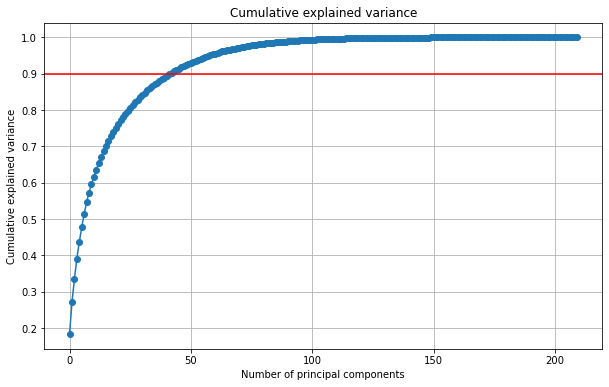

In [20]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

descriptors = data.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES'])
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(descriptors) # min max scaling
pca = PCA()
pca.fit(scaled_data) # perform PCA   

#explained_variance = pca.explained_variance_ratio_
#cumulative_variance = explained_variance.cumsum()
cumulative_variance = pca.explained_variance_ratio_.cumsum() # compute cumulative explained variance ratio

plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r')
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance')
plt.grid()
plt.show()